In [47]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

import pandas as pd

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [48]:
df = pd.read_csv("data/house_prices_data_training_data.csv")
df=df.dropna() #removing nans
df=df.sample(frac=1).reset_index(drop=True) #shuffling data

X, y = df.iloc[:, 3:], df.iloc[:, 2]
#X.head()



In [49]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure
    
    #MEC stands for Mark Edge Color to define the Color of the broder of the data point for easy visibility     
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Price')
   

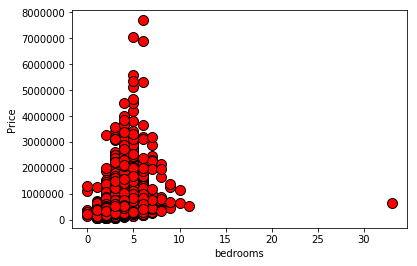

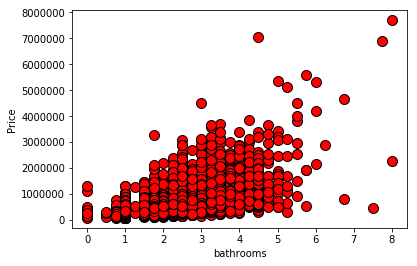

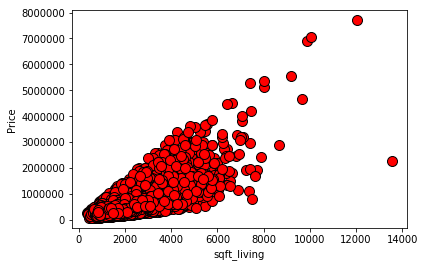

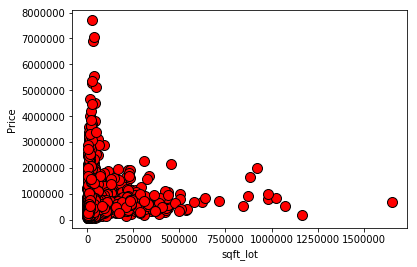

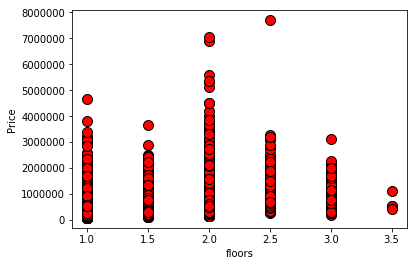

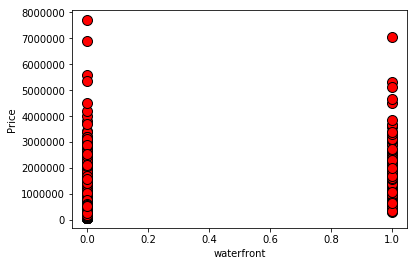

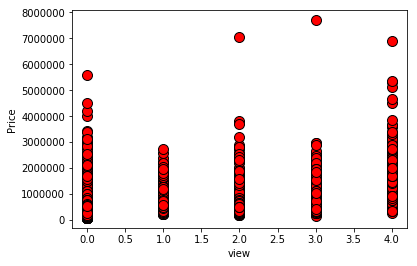

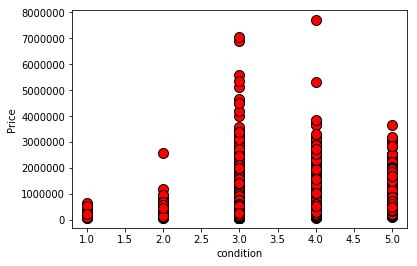

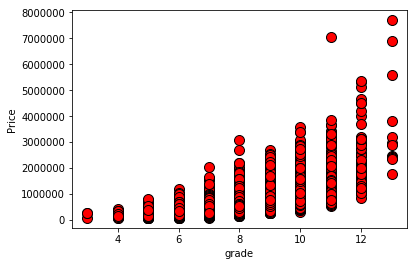

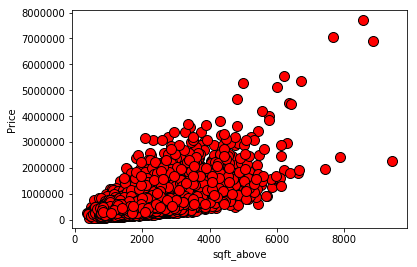

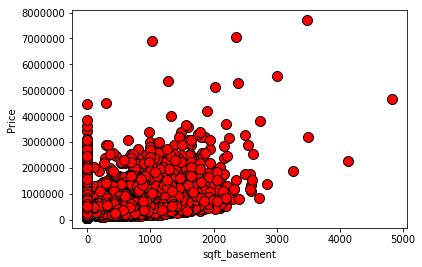

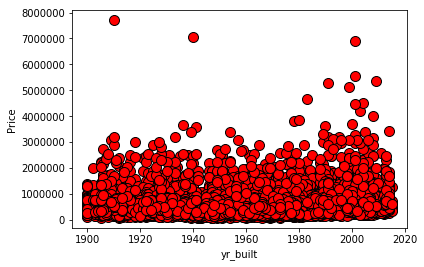

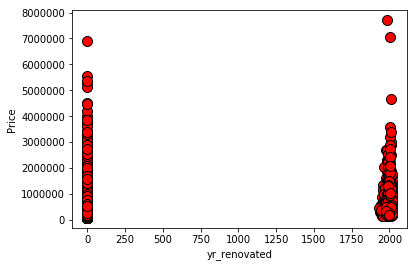

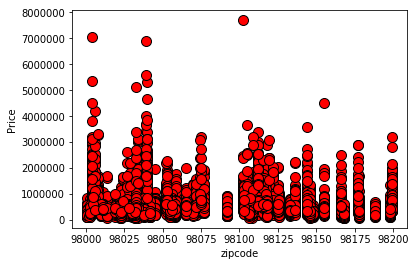

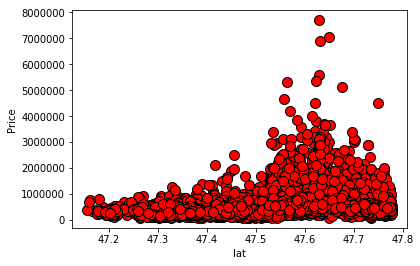

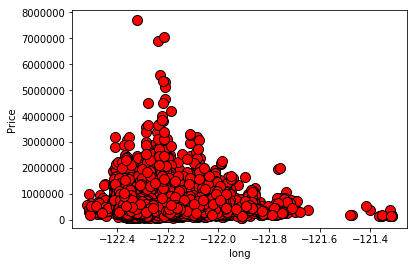

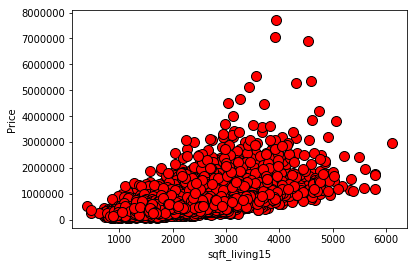

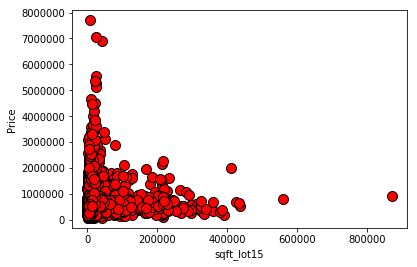

In [50]:
for i in range(len(X.columns)):
    plotData(X.iloc[:,i],y)
    pyplot.xlabel(X.columns[i])
pass

In [51]:
#By examining the dataset and the graphs some features seem to be very redundant and have no effect on the output whatsover 
#so we will be using 9 features
df=df.drop(['waterfront', 'view','long','lat','sqft_lot15','sqft_living15','zipcode','yr_renovated','yr_built'],axis=1)
data=np.array(df)
X, y = data[:, 3:], data[:, 2]

train=X[0:12964,:]
cv=X[12964:17285,:]
test=X[17285:21607,:]

ytr=y[0:12964]
ycv=y[12964:17285]
yte=y[17285:21607]

In [52]:
#hypothesis 2 --> x0+x1^2+x2^3+x3^4+x4^5+...
cv2=cv.copy()
test2=test.copy()
train2=np.concatenate([train,np.power(train[:,1],2)[:,None],np.power(train[:,2],3)[:,None],np.power(train[:,3],4)[:,None],
                       np.power(train[:,4],5)[:,None],np.power(train[:,5],6)[:,None],np.power(train[:,6],7)[:,None],
                       np.power(train[:,7],8)[:,None],np.power(train[:,8],9)[:,None]],axis=1)

cv2=np.concatenate([cv,np.power(cv[:,1],2)[:,None],np.power(cv[:,2],3)[:,None],np.power(cv[:,3],4)[:,None],
                       np.power(cv[:,4],5)[:,None],np.power(cv[:,5],6)[:,None],np.power(cv[:,6],7)[:,None],
                       np.power(cv[:,7],8)[:,None],np.power(cv[:,8],9)[:,None]],axis=1)

test2=np.concatenate([test,np.power(test[:,1],2)[:,None],np.power(test[:,2],3)[:,None],np.power(test[:,3],4)[:,None],
                       np.power(test[:,4],5)[:,None],np.power(test[:,5],6)[:,None],np.power(test[:,6],7)[:,None],
                       np.power(test[:,7],8)[:,None],np.power(test[:,8],9)[:,None]],axis=1)

In [53]:
#hypothesis 3 --> x0+x1+x2^2+x3^0.5
cv3=cv.copy()
test3=test.copy()
train3=np.concatenate([train,np.power(train[:,2],2)[:,None],np.power(train[:,3],0.5)[:,None],np.power(train[:,6],3)[:,None],
                       np.power(train[:,7],2)[:,None]],axis=1)

cv3=np.concatenate([cv,np.power(cv[:,2],2)[:,None],np.power(cv[:,3],0.5)[:,None],np.power(cv[:,6],3)[:,None],
                       np.power(cv[:,7],2)[:,None]],axis=1)

test3=np.concatenate([test,np.power(test[:,2],2)[:,None],np.power(test[:,3],0.5)[:,None],np.power(test[:,6],3)[:,None],
                       np.power(test[:,7],2)[:,None]],axis=1)

In [54]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    for i in range(X.shape[1]): 
        mu[i]=np.mean(X[:,i])
        sigma[i]=np.std(X[:,i])
        X_norm[:,i]=(X[:,i]-mu[i])/sigma[i]

    return X_norm, mu, sigma

In [55]:
train_norm, mu_tr, sigma_tr = featureNormalize(train)
train2_norm, mu_tr2, sigma_tr2 = featureNormalize(train2)
train3_norm, mu_tr3, sigma_tr3 = featureNormalize(train3)

cv_norm, mu_cv, sigma_cv = featureNormalize(cv)
cv_norm2, mu_cv2, sigma_cv2 = featureNormalize(cv2)
cv_norm3, mu_cv3, sigma_cv3 = featureNormalize(cv3)

test_norm, mu_te, sigma_te = featureNormalize(test)
test_norm2, mu_te2, sigma_te2 = featureNormalize(test2)
test_norm3, mu_te3, sigma_te3 = featureNormalize(test3)

print('Computed mean:', mu_tr)
print('Computed standard deviation:', sigma_tr)

Computed mean: [  3.36508794e+00   2.06292425e+00   2.05356125e+03   1.58046596e+04
   1.43049985e+00   3.44639000e+00   7.59410676e+00   1.75020742e+03
   3.03353826e+02]
Computed standard deviation: [  9.38277141e-01   7.55838737e-01   8.94360293e+02   4.27595182e+04
   5.08594778e-01   6.64230284e-01   1.17051974e+00   7.99970916e+02
   4.47593369e+02]


In [56]:
# Add intercept term to X
m=ytr.size
m1=ycv.size
m2=yte.size
train = np.concatenate([np.ones((m, 1)), train_norm], axis=1)
train2 = np.concatenate([np.ones((m, 1)), train2_norm], axis=1)
train3 = np.concatenate([np.ones((m, 1)), train3_norm], axis=1)

cv = np.concatenate([np.ones((m1, 1)), cv_norm], axis=1)
cv2 = np.concatenate([np.ones((m1, 1)), cv_norm2], axis=1)
cv3 = np.concatenate([np.ones((m1, 1)), cv_norm3], axis=1)

test = np.concatenate([np.ones((m2, 1)), test_norm], axis=1)
test2 = np.concatenate([np.ones((m2, 1)), test_norm2], axis=1)
test3 = np.concatenate([np.ones((m2, 1)), test_norm3], axis=1)

In [57]:
def computeCostMulti(X, y, theta):
    J=0
    m=y.shape[0]
    h=np.dot(theta,np.transpose(X))
    J=float((1./(2*m)) * np.dot((h-y).T,(h-y)))
    
    return J

In [58]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        hypothesis=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,hypothesis-y)))
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [59]:
def costFunctionReg(theta, X, y, lambda_):
     # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== YOUR CODE HERE ======================
    h=np.dot(theta,np.transpose(X))
    J=float((1./(2*m)) * np.dot((h-y).T,(h-y))+ (lambda_/(2*m))*np.sum(np.square(theta[1:])))
    
    infunc1 = h-y 
    temptheta=theta.copy()
    temptheta[0]=0
    gradient_in = np.dot(X.transpose(),infunc1)/m
    grad = gradient_in+(lambda_*temptheta/m) # theta(j) ; j>0
    
    grad = grad.flatten()
    # =============================================================
    return J

theta computed from gradient descent: [534097.1667555517 -38007.44768531143 -14129.192421696323 96052.14115555311
 -11756.39299674956 2253.4772875097647 40330.61383406277 127645.34172712477
 71106.48562717238 64840.32752650029]
Cost from hyp1 J: 28992673774.53069
theta computed from gradient descent2: [534097.1667555517 -16912.941476517284 -53473.3874709691 40734.07325229268
 -13599.139002620552 12972.652153412933 22628.28077298345 90554.30422154312
 18609.787971317444 48132.188803942576 53186.553535930856 81016.65938801633
 9526.574000273766 3425.9039357816064 20916.90506560019 71360.63293202416
 3639.987211935004 -2223.451046241591]
Cost from hyp2 J: 24563310151.468727
theta computed from gradient descent3: [534097.1667555512 -15441.764763293822 -6720.441676311198
 -11767.300445773823 36744.84545041536 7786.175795636163 41873.10752204214
 18936.92163346687 -27869.956374400906 26298.307936854046 177170.3292561955
 -54964.446267826446 131282.79850607505 16040.429703720487]
Cost from hy

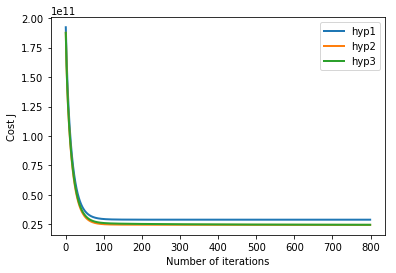

In [60]:
alpha = 0.03
num_iters = 800

# init theta and run gradient descent
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(train, ytr, theta, alpha, num_iters)
J=computeCostMulti(train, ytr, theta)
# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
print('Cost from hyp1 J: {:s}'.format(str(J)))

#------hyp2---------------------
# init theta and run gradient descent
theta2 = np.zeros(18)
theta2, J_history2 = gradientDescentMulti(train2, ytr, theta2, alpha, num_iters)
J2=computeCostMulti(train2, ytr, theta2)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent2: {:s}'.format(str(theta2)))
print('Cost from hyp2 J: {:s}'.format(str(J2)))

#------hyp3---------------------
# init theta and run gradient descent
theta3 = np.zeros(14)
theta3, J_history3 = gradientDescentMulti(train3, ytr, theta3, alpha, num_iters)
J3=computeCostMulti(train3, ytr, theta3)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
pyplot.legend(['hyp1', 'hyp2', 'hyp3'])
# Display the gradient descent's result
print('theta computed from gradient descent3: {:s}'.format(str(theta3)))
print('Cost from hyp3 J: {:s}'.format(str(J3)))

In [61]:
lambda_=[0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24]
Jreg=np.zeros(len(lambda_))
#grad=np.zeros(len(lambda_))
#grad=costFunctionReg(theta, cv, ycv, lambda_[0])
for i in range(len(lambda_)):
    Jreg[i]=costFunctionReg(theta, cv, ycv, lambda_[i])

print(Jreg)


[  3.19720264e+10   3.19720706e+10   3.19721148e+10   3.19722032e+10
   3.19723800e+10   3.19727335e+10   3.19734407e+10   3.19748549e+10
   3.19776834e+10   3.19833405e+10   3.19946545e+10   3.20172826e+10]


In [62]:
Jcv=computeCostMulti(cv, ycv, theta)   #cost of hyp1
Jcv2=computeCostMulti(cv2, ycv, theta2)  #cost of hyp2
Jcv3=computeCostMulti(cv3, ycv, theta3)  #cost of hyp3
print('Cost from hyp1 J: {:s}'.format(str(Jcv)))  #least difference between Jtrain
print('Cost from hyp2 J: {:s}'.format(str(Jcv2))) #Most difference  between Jtrain
print('Cost from hyp3 J: {:s}'.format(str(Jcv3)))

Cost from hyp1 J: 31972026394.209698
Cost from hyp2 J: 29780010779.482704
Cost from hyp3 J: 28675695919.3431


In [63]:
def predict(theta,X):
    m = X.shape[0] # Number of training examples

    hyp=np.dot(theta,X.T)
    return hyp

In [64]:
T1=predict(theta,test[0:5,:])
T2=predict(theta2,test2[0:5,:])
T3=predict(theta3,test3[0:5,:])
print('predicted from hyp1: {:s}'.format(str(T1)))
print('predicted from hyp2: {:s}'.format(str(T2)))
print('predicted from hyp3: {:s}'.format(str(T3)))
print('expected price: {:s}'.format(str(yte[0:5])))


predicted from hyp1: [715847.8016810596 339358.5694582279 323754.1688828024 491921.30284213123
 558996.2217151549]
predicted from hyp2: [640295.7734045329 360629.46093782375 321660.3604017347 469261.89095175156
 513254.32939827023]
predicted from hyp3: [673785.6828488758 357260.9437189261 328501.23375706916 466134.5981622631
 514721.8819044102]
expected price: [602000.0 287000.0 269000.0 435000.0 355000.0]
